# Travaux Pratiques Intelligence Artificielle: Lab1

Python 4 Data Science: Introduction à NumPy et Pandas 🤖 🙌.

## Objectifs du TP:

> **Se familiariser avec les instructions NumPy**

> **Se familiariser avec les commandes les plus utilisées pour l'exploration des données en utilisant la libraire Pandas**

> **Analyser les données pour pouvoir répondre à la question: Qu'est ce qui fait un Hit?** Pour ce faire, nous allons analyser les pistes musicales dont les données sont extraites de Spotify API. 



<br> A la fin du TP vous devez **rendre ce notebook dans "Assignment" de Teams**. Le TP doit être travaillé en préférence en binôme.

_Besoin d'aide? Laisser moi un Commentaire sur Teams_

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercices Numpy

### I. Warm-up Exercice

Ce petit exercice a pour objectif de vous familiariser avec les matrices multi-dimensionnelles NumPy.

<img src="resources/array.png" width=420>

1. Créer la matrice dépictée dans la figure

In [45]:
# import numpy
import numpy as np

In [46]:
# Créer la matrice
arr = np.array([[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14],[15,16,17,18,19],[20,21,22,23,24]])

In [47]:
# explorer la matrice 
for x in arr:
    print(x)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]


2.  Ecrire les instructions pour sélectionner les éléments en rouge, bleu et jaune.

In [48]:
# selectionner les éléments jaunes
arr1 = np.array(arr[4,:])
print(arr1)

[20 21 22 23 24]


In [49]:
# selectionner les éléments rouges
arr2 = np.array([arr[:1],arr[:,3]])
print(arr2)

[array([[0, 1, 2, 3, 4]]) array([ 3,  8, 13, 18, 23])]


In [50]:
# selectionner les éléments bleus

print(arr[1,:3:2],arr[3,:3:2])

[5 7] [15 17]


<br>

### II. Manipulation d'une image avec NumPy

L'objectif de cet exercice est de démontrer l'intérêt de NumPy, particulièrement pour la manipulation des images. Une image peut être considérée comme une matrice et peut donc facilement subir les transformations NumPy. 

On voudrait, dans cet exercice, lire une image, puis essayer de la brouiller (la rendre floue). Pour cela, on va essayer d'affecter à chaque pixel la moyenne de ses pixels voisins. 

Il est possible bien évidemment de faire la chose en bouclant sur les éléments de la matrice (double boucle). Mais on s'intéresse à le faire d'une manière optimisée en utilisant NumPy.

Essayons d'appliquer l'algorithme sur une petite matrice (il faut dire que ce n'est pas un algorithme state of the art, mais il fait l'affaire). Prenons une image de 4x4 pixels. L'idée est de la réduire en une image à 4 pixels comme c'est illustré dans la figure suivante:

<img src="resources/flou1.png">

In [51]:
matrice = np.arange(1,17).reshape((4,4))

In [52]:
matrice

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [53]:
matrice.shape

(4, 4)

<br> Calculer la moyenne des pixels voisins de chaque pixel flaggé dans notre image source revient à calculer la moyenne des matrices suivantes: 

<img src="resources/flou2.png">

<br> Selectionner le centre de cette matrice (jaune). Utilier les indexes relatifs pour que votre code soit généralisable pour n'importe quelle taille de matrice.

In [54]:
jaune = matrice[1:-1,1:-1]
print(jaune)

[[ 6  7]
 [10 11]]


<br> Selectionner le haut de cette matrice (violet):

In [55]:
ligne = int(len(matrice[:,0])/2)
violet = matrice[:ligne,1:-1]
print(violet)

[[2 3]
 [6 7]]


<br> Selectionner le bas de cette matrice (Rouge):

In [56]:
rouge = matrice[-ligne:,1:-1]
print(rouge)

[[10 11]
 [14 15]]


<br> Selectionner la partie gauche de cette matrice (bleu):

In [57]:
colonne = int(len(matrice[0])/2)
bleu = matrice[1:-1,:colonne]
print(bleu)

[[ 5  6]
 [ 9 10]]


<br> Selectionner la partie droite de cette matrice (vert):

In [58]:
vert = matrice[1:-1,-colonne:]
print(vert)

[[ 7  8]
 [11 12]]


<br> Calculer la matrice des moyennes (element-wise):

In [59]:
# matrice red-green-yellow
red_gr = np.array([ [jaune[0,0]+rouge[0,0]+vert[0,0],jaune[0,1]+rouge[0,1]+vert[0,1]] , [jaune[1,0]+rouge[1,0]+vert[1,0],jaune[1,1]+rouge[1,1]+vert[1,1]] ])
red_gr = red_gr/3
print(red_gr)
# matrice red-gblue-yellow
red_bl = np.array([ [jaune[0,0]+rouge[0,0]+bleu[0,0],jaune[0,1]+rouge[0,1]+bleu[0,1]] , [jaune[1,0]+rouge[1,0]+bleu[1,0],jaune[1,1]+rouge[1,1]+bleu[1,1]] ])
red_bl = red_bl/3
print(red_bl)
# matrice purple-green-yellow
gr_vi = np.array([ [jaune[0,0]+vert[0,0]+violet[0,0],jaune[0,1]+vert[0,1]+violet[0,1]] , [jaune[1,0]+vert[1,0]+violet[1,0],jaune[1,1]+vert[1,1]+violet[1,1]] ])
gr_vi = gr_vi/3
print(gr_vi)
# matrice purple-blue-yellow
bl_vi = np.array([ [jaune[0,0]+bleu[0,0]+violet[0,0],jaune[0,1]+bleu[0,1]+violet[0,1]] , [jaune[1,0]+bleu[1,0]+violet[1,0],jaune[1,1]+bleu[1,1]+violet[1,1]] ])
bl_vi = bl_vi/3
print(bl_vi)
# les moyennes des matrices
x0 = red_gr.mean()
x1 = red_bl.mean()
x2 = gr_vi.mean()
x3 = bl_vi.mean()
last = np.array([[x3,x2],[x1,x0]])
print(last)

[[ 7.66666667  8.66666667]
 [11.66666667 12.66666667]]
[[ 7.  8.]
 [11. 12.]]
[[ 5.  6.]
 [ 9. 10.]]
[[4.33333333 5.33333333]
 [8.33333333 9.33333333]]
[[ 6.83333333  7.5       ]
 [ 9.5        10.16666667]]


<br> Cette matrice présente l'image brouillée de l'image source.

<br> Maintenant on va généraliser cela sur une image quelconque, en définissant une fonction:

In [60]:
def brouiller(image):
    '''
    Arg: Image source
    Retourne l'image brouillée 
    '''
    
    
    # Appliquer l'algorithme sur l'image
    
    return image_brouillee

<br> Pour tester notre fonction, nous allons essayer de brouiller l'image "Metro". On utilisera Matplotlib pour ouvrir le fichier image.

In [61]:
import matplotlib.pyplot as plt

In [62]:
image = plt.imread('resources/Metro.png')

In [63]:
image

array([[0.6039216 , 0.6431373 , 0.6784314 , ..., 0.59607846, 0.5921569 ,
        0.63529414],
       [0.6666667 , 0.654902  , 0.654902  , ..., 0.654902  , 0.64705884,
        0.6392157 ],
       [0.68235296, 0.6784314 , 0.6666667 , ..., 0.61960787, 0.57254905,
        0.5764706 ],
       ...,
       [0.14509805, 0.15294118, 0.16078432, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.14117648, 0.15686275, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863],
       [0.14117648, 0.15294118, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863]], dtype=float32)

In [64]:
type(image), image.dtype, image.shape

(numpy.ndarray, dtype('float32'), (461, 615))

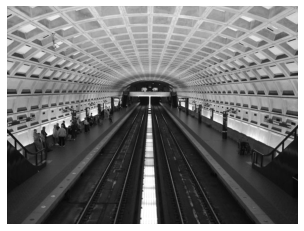

In [65]:
# Ouvrir l'image en gris

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [66]:
image_brouillee = brouiller(image)

NameError: name 'image_brouillee' is not defined

In [ ]:
# Afficher la nouvelle image
plt.imshow(image_brouillee)
plt.gray()
plt.axis('off')
plt.show()

<br> Comme on n'a appliqué le filtre qu'une seule fois, les différences sont difficiles à discerner. Mais si vous affichez la différence entre les deux images, vous verrez quelques changements.

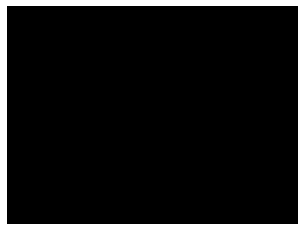

In [83]:
plt.imshow(image - image)
plt.axis('off')
plt.show()

In [ ]:
# Afficher la différence entre l'image source et l'image brouillée



<br> Afin d'effectivement brouiller l'image, vous pouvez réappliquer le filtre une 50aine de fois: 

In [ ]:
# Boucler et appliquer le filtre, puis afficher l'image résultante



<br>

### Explorer d'autres possibilités: 

Vous pouvez explorer d'autres manipulations des images avec Numpy (incluant les données RGB): https://note.nkmk.me/en/python-numpy-image-processing/

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Introduction à Pandas

## A. Importer et examiner les données

Pandas est très fort dans la lecture et le traitement des données structurées. Pour notre analyse, nous aurons besoins de lire les fichiers csv pour pouvoir les explorer. Nos données sont issues de Spotify et englobent plus de 160.000 pistes musicales extraites à partir de Spotify Web API. Ces informations sont également groupées par artiste, année, et genre musical. 

Le dossier music_dataset contient donc 5 fichiers csv:
- data_by_artist
- data_by_genres
- data_by_year
- data_w_genres
- data

Avant d'attaquer les données dans plus de détails, il est très judicieux de commencer par une exploration rapide. Ceci vous permettra de répondre aux questions: A quelles données ai-je affaire? Quelle est la qualité de ces données là?.... 

Les données sont extraites en utilisant l'API de Spotify. Pour plus de détails sur les métadata, vous pouvez explorer: https://developer.spotify.com/documentation/web-api/reference/

#### 1. Importer les données

Commencer par importer pandas en respectant la convention d'import.

In [2]:
import pandas as pd

<br> Lire le fichier csv 'data.csv' relatif aux données des pistes dans une dataframe.

In [3]:
df = pd.read_csv("music_dataset/data.csv",sep=',')

<br> Afficher les premières lignes de la dataframe créée.

In [21]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


<br> Afficher la taille et la forme de votre dataframe. 

In [22]:
print(df.size)
print(df.shape)
# 169909 lignes et 19 colonnes

3228271
(169909, 19)


In [61]:
df.dtypes


acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

<br></br>
#### 2. Examiner vos données:

<br> Dresser une liste des colonnes avec une description de leurs types, valeurs possibles (intervales si numérique)... Penser à utiliser les différentes fonctions Pandas disponibles. 

In [60]:
liste = [ [0]*df.shape[1] for i in range(2) ]
for i in range(df.shape[1]):
    liste[0][i] = str(df.columns[i])
    liste[1][i] = str(df.dtypes[i])    
print(liste)
print(df.max(axis=0))
print(df.min(axis=0))



[['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year'], ['float64', 'object', 'float64', 'int64', 'float64', 'int64', 'object', 'float64', 'int64', 'float64', 'float64', 'int64', 'object', 'int64', 'object', 'float64', 'float64', 'float64', 'int64']]
acousticness                                      0.996
artists                                          ['黑豹']
danceability                                      0.988
duration_ms                                     5403500
energy                                                1
explicit                                              1
id                               7zzuPsjj9L3M7ikqGmjN0D
instrumentalness                                      1
key                                                  11
liveness                                              1
loudness        

<br></br>
#### 2. Modifier vos données:

<br> Changer le type de la colonne popularité en un int.

In [22]:
df.popularity = df.popularity.astype('int32')
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int32
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

<br> Spécifier que l'index de la Dataframe est le nom de la piste. Puis revenez à l'index d'origine.

In [30]:
df.set_index('name')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,,
Singende Bataillone 1. Teil,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
"Fantasiestücke, Op. 111: Più tosto lento",0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
Chapter 1.18 - Zamek kaniowski,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
Bebamos Juntos - Instrumental (Remasterizado),0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Skechers (feat. Tyga) - Remix,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,75,2020-05-15,0.1430,100.012,0.3060,2020
Sweeter (feat. Terrace Martin),0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,64,2020-06-08,0.0403,128.000,0.2700,2020
How Would I Know,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,70,2020-05-29,0.1050,123.700,0.1530,2020


In [33]:
df.reset_index()

,index,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


<br> Supprimer la colonne id faisant référence aux ID des pistes dans Spotify API. Vérifier que la colonne a été supprimée en listant les colonnes.

In [74]:
df.drop('id',axis=1,inplace=True)

In [77]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

<br> Supprimer la première ligne de notre DataFrame. 

In [41]:
df.drop(index=0,inplace=True)

In [44]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928


<br></br>
Maintenant que nous avons une idée sur les données de notre Dataset on peut **penser à des questions à poser. Lister un maximum de questions.** On peut revenir enrichir cette liste au fur et à mesure qu'on explore nos données.
- Quelle est la popularité des pistes selon les années?
- Quels sont les artistes dont les chansons sont unilatéralement bien reçues?
- Quels sont les genres les plus populaires?
- Y-a-t-il des correlations entre les caractéristiques d'une piste et sa popularité?
- ...

<br></br>
## B. Traiter vos données

Pandas fournit une panoplie de fonctions permettant de selectionner, filtrer, ordonner... vos données. On va les utiliser pour mieux comprendre nos données.

### 1. Selectionner les données:

1. Afficher les pistes publiée l'année de votre naissance.

In [87]:
df[df["year"]==1999] #ce n'est pas une copie qui est renvoyée, mais une vue, donc, on ne peut pas modifier le résultat


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
5954,0.09350,"[""Gov't Mule""]",0.418,549933,0.633,0,0.079000,10,0.7590,-8.138,1,Soulshine,41,1999-02-05,0.0462,122.781,0.483,1999
5955,0.65400,['Grupo Exterminador'],0.550,277467,0.487,0,0.000014,9,0.3600,-9.917,1,El Albur De Tu Vida,43,1999-01-01,0.0892,153.896,0.797,1999
5956,0.90200,"['John Prine', 'Fiona Prine']",0.572,170400,0.187,0,0.000000,6,0.2750,-14.848,1,Til a Tear Becomes a Rose (feat. Fiona Prine),41,1999-09-28,0.0363,133.543,0.513,1999
5957,0.01860,['The Magnetic Fields'],0.471,142600,0.866,0,0.002960,7,0.1170,-8.019,1,I Don't Want to Get Over You,43,1999-09-14,0.0886,120.415,0.265,1999
5958,0.41400,['Grupo Cañaveral De Humberto Pabón'],0.694,326640,0.658,0,0.000483,0,0.0485,-9.215,1,Vuelvo A Sentir,53,1999-01-01,0.0368,159.208,0.746,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167804,0.21700,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",0.515,292933,0.590,0,0.000013,9,0.1280,-7.578,0,I Saved the World Today - Remastered,56,1999-10-19,0.0327,117.835,0.208,1999
167805,0.01030,['311'],0.553,283027,0.901,1,0.003120,0,0.0571,-6.202,1,Sever,42,1999-10-12,0.0454,106.943,0.617,1999
167806,0.01130,['Red Hot Chili Peppers'],0.712,157627,0.969,0,0.031900,4,0.0904,-1.503,0,I Like Dirt,49,1999-06-08,0.1610,105.077,0.802,1999
167807,0.00596,"[""Liran' Roll""]",0.363,200053,0.785,0,0.004670,9,0.1280,-5.321,0,Quien Te Cantara,53,1999,0.0484,155.016,0.536,1999


2. Stocker le résultat dans une nouvelle Dataframe. Combien de pistes y'en a-t-il?

In [99]:
dt = df.loc[df['year'] == 1999,:]
dt.shape[0]         #2000 pistes

2000

In [102]:
#on peut utiliser la fonction count (2000 valeurs non null )
dt.count()

acousticness        2000
artists             2000
danceability        2000
duration_ms         2000
energy              2000
explicit            2000
instrumentalness    2000
key                 2000
liveness            2000
loudness            2000
mode                2000
name                2000
popularity          2000
release_date        2000
speechiness         2000
tempo               2000
valence             2000
year                2000
dtype: int64

3. Afficher la colonne 'year' dans la nouvelle Dataframe et vérifier que seule l'année de votre naissance est incluse.

In [103]:
dt['year']

5954      1999
5955      1999
5956      1999
5957      1999
5958      1999
          ... 
167804    1999
167805    1999
167806    1999
167807    1999
167808    1999
Name: year, Length: 2000, dtype: int64

In [108]:
dt['year'].unique()

array([1999], dtype=int64)

4. N'afficher que les informations relatives à l'artiste, le nom de la piste, et sa popularité.

In [109]:
df[['artists','name','popularity']]

,artists,name,popularity
0,['Carl Woitschach'],Singende Bataillone 1. Teil,0
1,"['Robert Schumann', 'Vladimir Horowitz']","Fantasiestücke, Op. 111: Più tosto lento",0
2,['Seweryn Goszczyński'],Chapter 1.18 - Zamek kaniowski,0
3,['Francisco Canaro'],Bebamos Juntos - Instrumental (Remasterizado),0
4,"['Frédéric Chopin', 'Vladimir Horowitz']","Polonaise-Fantaisie in A-Flat Major, Op. 61",1
...,...,...,...
169904,"['DripReport', 'Tyga']",Skechers (feat. Tyga) - Remix,75
169905,"['Leon Bridges', 'Terrace Martin']",Sweeter (feat. Terrace Martin),64
169906,"['Kygo', 'Oh Wonder']",How Would I Know,70
169907,"['Cash Cash', 'Andy Grammer']",I Found You,70


<br>

### 2. Filter les données

Revenir à la Dataframe d'origine.

1. N'afficher que les chansons les plus populaires. Vous pouvez choisir un seuil de popularité en fonction de vos données. Voir rapidement la distribution de la popularité en utilisant la fonction hist() de Pandas.

array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

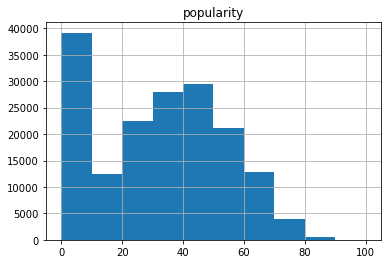

In [111]:
df.hist(column='popularity')

In [118]:
df[df['popularity'] >= 80]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7957,0.0258,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",0.727,216067,0.815,1,0.000000,3,0.2310,-2.454,1,Quizas,81,2019-10-11,0.1530,176.075,0.677,2019
8033,0.1820,"['Reik', 'J Balvin', 'Lalo Ebratt']",0.738,217253,0.748,0,0.000000,0,0.1100,-4.902,1,Indeciso,80,2019-08-23,0.0453,94.949,0.896,2019
8058,0.1830,['Juanfran'],0.827,187500,0.629,0,0.000000,6,0.0840,-3.966,0,Como Llora,81,2020-02-07,0.1850,88.064,0.486,2020
8099,0.0858,"['Cali Y El Dandee', 'Sebastian Yatra']",0.643,209027,0.769,0,0.000000,8,0.2050,-3.533,1,Locura,81,2020-05-07,0.0877,185.669,0.532,2020
24159,0.0362,"['Sebastian Yatra', 'Rauw Alejandro', 'Manuel ...",0.794,239133,0.855,0,0.000000,2,0.1420,-1.959,1,TBT,80,2020-02-20,0.0466,91.963,0.639,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161400,0.2070,"['Casper Magico', 'Anuel AA']",0.712,182676,0.851,1,0.000004,0,0.0334,-3.359,1,Sola & Vacía,82,2020-04-16,0.1490,95.973,0.542,2020
161407,0.8170,['Maluma'],0.565,193700,0.390,0,0.000000,9,0.1260,-4.959,1,ADMV,80,2020-04-23,0.0556,163.781,0.708,2020
161477,0.1310,['J Balvin'],0.885,200267,0.680,0,0.000018,11,0.0875,-3.837,0,Morado,81,2020-03-19,0.0848,97.003,0.780,2020
169779,0.2160,"['Ir Sais', 'Rauw Alejandro']",0.767,192452,0.643,1,0.000104,5,0.0806,-5.225,1,Dream Girl - Remix,80,2019-12-06,0.1010,169.990,0.536,2019


In [117]:
#seulement 572 pistes ont un taux de popularité dépassant 80%

array([  0,   1,   2,   3,   7,   6,   5,   4,   8,  14,  13,  11,  10,
        12,   9,  15,  19,  17,  18,  16,  20,  24,  21,  23,  22,  25,
        42,  28,  27,  37,  36,  35,  30,  26,  29,  44,  32,  33,  31,
        41,  46,  34,  45,  40,  38,  39,  54,  48,  58,  52,  47,  43,
        49,  51,  56,  55,  50,  57,  59,  66,  53,  61,  60,  62,  64,
        65,  69,  72,  63,  70,  68,  67,  71,  74,  75,  78,  81,  77,
        73,  80,  76,  79,  82,  83,  85,  84,  91,  92,  87,  86,  89,
        95,  93,  88,  90,  94,  99,  96, 100,  97], dtype=int64)

2. Afficher les chansons dont l'energie est proche de 1 et la clé est 6.


In [124]:
df[(df['energy']>0.9) & (df['key']==6)]


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
408,0.959000,['Marika Ninou'],0.575,191853,0.941,0,0.609000,6,0.3000,-10.920,0,Palamakia palamakia,1,1940-01-01,0.1360,170.691,0.531,1940
2640,0.006040,['Europe'],0.517,224467,0.939,0,0.000000,6,0.0977,-2.864,0,Danger On the Track,17,1965,0.0509,96.887,0.543,1965
3581,0.415000,['KISS'],0.365,237958,0.946,0,0.001770,6,0.9760,-7.079,1,Got To Choose - Live,31,1975-09-10,0.1080,121.288,0.310,1975
3589,0.281000,['KISS'],0.527,181333,0.948,0,0.000053,6,0.2240,-5.325,1,Room Service,34,1975-03-19,0.0494,153.395,0.842,1975
3622,0.363000,['KISS'],0.643,161360,0.912,0,0.012000,6,0.0767,-5.235,1,Love Her All I Can,32,1975-03-19,0.0812,146.863,0.939,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168918,0.000029,['Foo Fighters'],0.420,286467,0.914,0,0.028200,6,0.2200,-4.322,0,Bridge Burning,57,2011-04-12,0.0431,170.199,0.301,2011
169105,0.014800,['Memphis May Fire'],0.511,252320,0.942,0,0.000004,6,0.1120,-3.254,0,Miles Away - feat. Kellin Quinn,52,2012-06-26,0.1070,118.002,0.515,2012
169167,0.000532,['I See Stars'],0.264,344187,0.960,0,0.001230,6,0.2140,-2.968,1,Ten Thousand Feet,53,2013-10-22,0.0906,139.967,0.212,2013
169224,0.000351,"['Dimitri Vegas & Like Mike', 'Martin Garrix']",0.631,294467,0.939,0,0.747000,6,0.9550,-4.210,0,Tremor - Sensation 2014 Anthem,58,2014-07-01,0.0363,127.992,0.452,2014


3. N'affichez que les pistes qui n'ont pas de paroles explicites et qui ont une grande popularité (dont le seuil est à vous de définir).

In [128]:
df[(df['explicit']==0) & (df['popularity']>=80)]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
8033,0.1820,"['Reik', 'J Balvin', 'Lalo Ebratt']",0.738,217253,0.748,0,0.000000,0,0.1100,-4.902,1,Indeciso,80,2019-08-23,0.0453,94.949,0.896,2019
8058,0.1830,['Juanfran'],0.827,187500,0.629,0,0.000000,6,0.0840,-3.966,0,Como Llora,81,2020-02-07,0.1850,88.064,0.486,2020
8099,0.0858,"['Cali Y El Dandee', 'Sebastian Yatra']",0.643,209027,0.769,0,0.000000,8,0.2050,-3.533,1,Locura,81,2020-05-07,0.0877,185.669,0.532,2020
24159,0.0362,"['Sebastian Yatra', 'Rauw Alejandro', 'Manuel ...",0.794,239133,0.855,0,0.000000,2,0.1420,-1.959,1,TBT,80,2020-02-20,0.0466,91.963,0.639,2020
32074,0.0160,"['Calvin Harris', ""Rag'n'Bone Man""]",0.807,229184,0.887,0,0.000503,1,0.0811,-4.311,0,Giant (with Rag'n'Bone Man),80,2019-01-11,0.0361,122.015,0.606,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161371,0.4060,"['Rauw Alejandro', 'Chencho Corleone']",0.849,217143,0.781,0,0.000000,0,0.0801,-4.635,0,El Efecto,86,2019-03-15,0.1590,84.041,0.893,2019
161372,0.5360,"['Alan Walker', 'Ava Max']",0.670,179053,0.668,0,0.000000,3,0.1330,-4.306,0,"Alone, Pt. II",84,2019-12-27,0.0422,88.033,0.608,2019
161407,0.8170,['Maluma'],0.565,193700,0.390,0,0.000000,9,0.1260,-4.959,1,ADMV,80,2020-04-23,0.0556,163.781,0.708,2020
161477,0.1310,['J Balvin'],0.885,200267,0.680,0,0.000018,11,0.0875,-3.837,0,Morado,81,2020-03-19,0.0848,97.003,0.780,2020


4. Afficher les pistes dont la popularité est >95 ou la date de publication est antérieure au 01/Juin de cette année. 

In [133]:
df[(df['popularity']>95) | (df['release_date'] < str(1999-6-1))]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167004,0.8050,['Nat King Cole'],0.201,204627,0.2130,0,0.000082,8,0.1260,-14.531,1,Too Young,40,1991-01-01,0.0298,96.324,0.2030,1991
167005,0.8650,['El Piporro'],0.472,213078,0.3690,0,0.000000,2,0.0664,-7.903,1,Rosita Alvírez,42,1991-12-19,0.1130,195.677,0.8230,1991
167006,0.0113,['DJ Quik'],0.815,226733,0.2710,1,0.000002,4,0.0565,-18.245,0,Tha Bombudd,34,1991,0.1460,73.288,0.8520,1991
167007,0.0808,['Chris Rea'],0.565,303600,0.6700,0,0.466000,11,0.0518,-13.777,0,Looking for the Summer,53,1991-02-25,0.0320,95.027,0.2530,1991


5. Afficher les pistes de votre artiste préféré. Vous pouvez utiliser les fonction str. pour chercher les lignes qui contiennent un bout du nom, mettre le texte en miniscule.. si vous n'êtes pas sûr(e)s comment le nom est stocké dans la dataset.

N.B. Il est possible d'avoir recours à du fuzzy matching en utilisant regex ou des libraries spécialisée.

In [43]:
df[df['artists'].str.contains('Chris Rea')]


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
28999,0.039500,['Chris Rea'],0.704,243347,0.466,0,5GYzxG9pPDGOBiQrynxjQm,0.000008,11,0.0950,-6.931,0,Fool (If You Think It's Over),43,1988-10-17,0.0311,110.199,0.872,1988
44915,0.011000,['Chris Rea'],0.556,308693,0.481,0,79tFn7ZF652A89oMkiRSea,0.002040,2,0.1690,-11.743,1,Texas,35,1989-10-02,0.0331,150.036,0.467,1989
51905,0.003400,['Chris Rea'],0.689,211146,0.722,0,7n0lp1r1yHYXN2jZvqzbAI,0.041000,7,0.0488,-8.575,1,I Can Hear Your Heartbeat,43,1983-07-18,0.0313,123.145,0.970,1983
74690,0.153000,['Chris Rea'],0.632,247066,0.641,0,2HDc1De9ZdPO1DDLao0iIw,0.396000,2,0.0548,-6.906,1,Let's Dance,42,1987-07-04,0.0288,161.373,0.927,1987
74843,0.556000,['Chris Rea'],0.603,239947,0.705,0,0ZoHHROTzwIYeNAHRPedTY,0.000123,9,0.3420,-7.547,1,Driving Home for Christmas,39,1988-10-17,0.0328,90.120,0.890,1988
76743,0.557000,['Chris Rea'],0.592,270986,0.652,0,72wERbZ4yx2cNaoEj5jYnl,0.001190,9,0.0879,-10.351,1,Ace of Hearts,43,2007-11-10,0.0298,105.244,0.612,2007
103045,0.312000,['Chris Rea'],0.722,284533,0.412,0,0UHiH4dy1hXULYl8CgNxRV,0.000025,4,0.0448,-14.300,0,Fool (If You Think It's Over),50,1978-11-10,0.0267,105.927,0.910,1978
132036,0.022300,['Chris Rea'],0.656,237560,0.469,0,6JFfOp1LTXnyDCTfHlOc9j,0.008660,3,0.0475,-15.941,0,Josephine,55,1985-07-18,0.0281,110.037,0.660,1985
157715,0.011000,['Chris Rea'],0.556,308693,0.481,0,1BiG4OiQ6Fspfay6DF7x39,0.002040,2,0.1690,-11.743,1,Texas,34,1983-07-18,0.0331,150.036,0.467,1983
158072,0.231000,['Chris Rea'],0.747,302427,0.575,0,0fJMNr4wzaVWNM2nb9hdqx,0.093500,5,0.8140,-12.017,0,On the Beach,51,1986-04-01,0.0311,114.528,0.615,1986


6. Afficher les pistes dont la clé appartient à la liste: [0, 3, 5, 8, 10]

In [167]:
df[df['key'].isin([0,3,5,8,10])]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
10,0.9940,"['Sergei Rachmaninoff', 'Vladimir Horowitz']",0.376,590293,0.0719,0,0.883000,10,0.1960,-21.849,0,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....",0,1928,0.0352,141.390,0.0393,1928
11,0.9890,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169899,0.3710,['YoungBoy Never Broke Again'],0.623,161019,0.7210,1,0.000000,10,0.1090,-4.584,0,Rough Ryder,64,2020-04-24,0.3390,166.637,0.7190,2020
169902,0.0227,"['Trey Songz', 'Summer Walker']",0.619,194576,0.7190,1,0.000000,0,0.0839,-4.111,1,Back Home (feat. Summer Walker),69,2020-04-29,0.1570,86.036,0.3510,2020
169903,0.2100,"['LEGADO 7', 'Junior H']",0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,Ojos De Maniaco,68,2020-02-28,0.0374,97.479,0.9340,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020


7. Afficher les pistes dont la clé n'appartient pas à cette liste

In [166]:
df[-df['key'].isin([0,3,5,8,10])]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
3,0.9950,['Francisco Canaro'],0.781,180760,0.130,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.204,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.9950,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.120,0,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.9560,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.197,0,0.435000,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.9880,['Carl Woitschach'],0.555,153967,0.421,0,0.836000,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169900,0.0452,['Kelly Clarkson'],0.655,216107,0.719,0,0.000018,2,0.1090,-7.400,1,I Dare You,69,2020-04-16,0.0368,124.034,0.4350,2020
169901,0.2640,"['Meek Mill', 'Roddy Ricch']",0.744,167845,0.702,1,0.000000,7,0.1200,-6.255,0,Letter To Nipsey (feat. Roddy Ricch),66,2020-01-27,0.2880,91.885,0.3380,2020
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020


7. Afficher les pistes dont la clé n'appartient pas à cette liste

In [ ]:
df[-df['key'].isin([0,3,5,8,10])]

8. Filtrer par type de colonne et n'inclure que les colonnes numériques.

In [31]:
import numpy as np
for x in df.columns:
   if np.issubdtype(df[x].dtype, np.number):
       print(x+' : '+str(df[x].dtype))

acousticness : float64
danceability : float64
duration_ms : int64
energy : float64
explicit : int64
instrumentalness : float64
key : int64
liveness : float64
loudness : float64
mode : int64
popularity : int64
speechiness : float64
tempo : float64
valence : float64
year : int64


9. Créer votre propre question et le filtre y correspondant


Créer un nouveau tableau qui ne contient que les colonnes numériques avec leurs données respectives.

In [55]:
import numpy as np
column = []
for x in df.columns:
   if np.issubdtype(df[x].dtype, np.number):
       column += [x]
       
df[column]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


### 3. Ordonner les données

1. Afficher les pistes selon leur année de publication croissante

In [69]:
df[['name','year']].sort_values(by=['year'])

,name,year
78157,Perestij,1921
78098,Eşin Var âşiyâ Var,1921
78068,Clancy Lowered the Boom,1921
78069,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921
78070,How Can You Buy Killarny,1921
...,...,...
24216,Como Duele Equivocarse,2020
24217,玉,2020
24218,Carried Me With You,2020
70580,Pressure,2020


2. Afficher les 10 pistes les plus récentes sur l'ensemble des pistes

In [71]:
df[['name','year']].sort_values(by=['year'],ascending=False).head(10)

,name,year
169908,More Hearts Than Mine,2020
70623,Dominican Mami (feat. Fivio Foreign),2020
70613,Heading Home,2020
70614,Song About You,2020
70615,All Night (feat. Ally Brooke),2020
70616,Caution - Clean Bandit Remix,2020
70617,Thin White Lies,2020
70618,Mi Casa,2020
70619,Vast Surroundings,2020
70620,Shake The Room (feat. Quavo),2020


3. Afficher la piste la plus populaire de votre artiste préféré?  

In [83]:
df[df['artists'].str.contains('Chris Rea')].sort_values(by=['popularity'],ascending=False).head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
132036,0.0223,['Chris Rea'],0.656,237560,0.469,0,6JFfOp1LTXnyDCTfHlOc9j,0.00866,3,0.0475,-15.941,0,Josephine,55,1985-07-18,0.0281,110.037,0.66,1985


4. Est-ce que les pistes les plus populaires sont toujours les plus récentes ? 

In [95]:
df.groupby('popularity').mean().tail(10)
# On remarque que les pistes plus populaires sont toujours les plus recentes

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
popularity,,,,,,,,,,,,,,
90,0.238934,0.738667,199542.888889,0.613222,0.333333,0.109902,3.888889,0.217033,-6.674444,0.444444,0.156667,122.111333,0.542778,2019.666667
91,0.307035,0.673333,191574.000000,0.542167,0.500000,0.021681,6.833333,0.123983,-7.412333,0.666667,0.098183,103.433667,0.468750,2018.666667
92,0.148641,0.758923,198109.461538,0.674769,0.538462,0.000015,6.615385,0.176700,-5.326615,0.538462,0.172038,116.124308,0.521308,2019.076923
93,0.150500,0.819667,193251.333333,0.663667,0.333333,0.000001,9.000000,0.085667,-5.310000,0.333333,0.100000,115.641667,0.719000,2019.000000
94,0.342280,0.686400,180044.600000,0.602400,0.200000,0.000021,6.000000,0.240920,-6.495200,0.600000,0.115420,141.666400,0.543600,2019.800000
95,0.199650,0.816750,210934.750000,0.611250,0.750000,0.000479,7.250000,0.355000,-7.173250,0.250000,0.099875,109.904000,0.656500,2019.250000
96,0.233000,0.716000,165978.000000,0.537000,1.000000,0.000000,0.000000,0.157000,-7.648000,0.000000,0.051400,129.979000,0.280000,2020.000000
97,0.731000,0.726000,173333.000000,0.431000,0.000000,0.000000,8.000000,0.696000,-8.765000,0.000000,0.135000,144.026000,0.348000,2020.000000
99,0.247000,0.746000,181733.000000,0.690000,1.000000,0.000000,11.000000,0.101000,-7.956000,1.000000,0.164000,89.977000,0.497000,2020.000000


### 4. Traiter les données manquantes et les données dupliquées

L'un des problèmes les plus récurrents dans les projets data science est la qualité des données à commencer par leur complétude. Il faut toujours se poser la question: **Est-ce qu'il y a des données manquantes? et si c'est le cas comment les gérer?**

Lire le fichier data_withmissingdata.csv dans une Dataframe.

In [4]:
df1 = pd.read_csv("music_dataset/data_withmissingdata.csv",sep=',')
df1

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928.0
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928.0
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928.0
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928.0
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.90800,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.00233,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020.0
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.00000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020.0
169908,0.1090,['Ingrid Andress'],0.512,214787,0.4280,0,60RFlt48hm0l4Fu0JoccOl,0.00000,0,0.1050,-7.387,1,More Hearts Than Mine,65,2020-03-27,0.0271,80.588,0.3660,2020.0
169909,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928.0


<br> Il faut d'abord identifier les données manquantes. Quelle(s) colonne(s) est/sont concernées?  

In [72]:
dt = df1.isnull()
dt.mean()
# On a calculé la moyenne des valeurs 'True' dans chaque colonne. 
# Donc la colonne concernée est la colonne 'Year'

acousticness        0.000000
artists             0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
explicit            0.000000
id                  0.000000
instrumentalness    0.000000
key                 0.000000
liveness            0.000000
loudness            0.000000
mode                0.000000
name                0.000000
popularity          0.000000
release_date        0.000000
speechiness         0.000000
tempo               0.000000
valence             0.000000
year                0.000041
dtype: float64

<br> Selectionner les lignes où les données sont manquantes. De combien de lignes s'agit-il?

In [73]:
df1[df1['year'].isnull()]
# 7 lignes

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
15,0.991,"['George Butterworth', 'John Cameron']",0.319,184840,0.00593,0,6Sdpmree8xpGWaedACPMlP,0.000063,7,0.0691,-25.789,0,A Shropshire Lad: Is My Team Ploughing?,0,1928,0.0510,79.831,0.169,NaN
48,0.461,['Shungi Music Crew'],0.733,369721,0.61300,0,6jIUK38SalSc8jYFLW4FYv,0.951000,7,0.1220,-8.749,1,Rumours,0,1928-08-20,0.0383,123.019,0.260,NaN
377,0.960,['Anuradha Paudwal'],0.547,203170,0.22800,0,2OwkpxK4xTOUW2vus3Koct,0.002030,7,0.8090,-12.266,1,Mere Jeevan Ke Saathi,0,1940-12-31,0.0608,113.984,0.614,NaN
604,0.994,['Shamshad Begum'],0.448,191790,0.18200,0,2plEHDXKPHJNcL77bL4GaA,0.747000,1,0.1780,-13.124,1,Naina Bhar Aaye Neer,0,1945-01-01,0.0918,69.041,0.315,NaN
1540,0.479,['Art Blakey'],0.664,180133,0.54900,0,76nNyfv2cOdC4zToPQrG8Z,0.038000,9,0.2570,-10.250,0,Salute to Birdland,2,1954-01-01,0.0462,128.947,0.654,NaN
1819,0.741,['Sonny Rollins'],0.547,316053,0.08730,0,69qn9lq7s1V54v87NUCFQM,0.401000,7,0.0884,-20.051,0,There Is No Greater Love,16,1957,0.0613,83.749,0.354,NaN
2888,0.554,['Otis Redding'],0.429,185520,0.41600,0,2oLaZVSbX8U2zXrzHiBixE,0.000059,2,0.1140,-10.941,0,I'm Coming Home to See About You,28,1968-02-23,0.0450,166.774,0.480,NaN


<br> Il est très utile de stocker les indices de ces lignes dans une liste qu'on pourra utiliser pour les selections et les vérifications. Afficher la liste des indexes de ces lignes.

In [74]:
dNan = df1[df1['year'].isnull()]
li_mq = []
for x in dNan.index :
    li_mq.append(x)
li_mq


[15, 48, 377, 604, 1540, 1819, 2888]

<br> On voudrait remplir les données manquantes dans year. Pandas offre plusieurs possiblités de méthodes standards à appliquer pour remplir les données manquantes. Dans notre cas, on voudrait remplir par l'année dans release_date. 

Il est possible d'extraire l'année d'une date, mais il faut d'abord convertir la colonne release_date en type date, puis remplir les valeurs manquantes de year par les valeurs year de release_date.

In [175]:
for x in dt.index:
    df1['year'][x] = df1['release_date'][x]
    

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


<br> Vérifier à l'aide de la liste des indexes créée que les valeurs year ont été bel est bien remplies.

In [ ]:
for x in dt.index:
    print(df1.iloc[x])

<br> Il est notamment possible de supprimer les lignes dont une des valeurs est nulle. Vous pouvez relire les données, supprimer les lignes et réanalyser. 

In [15]:
df2 = pd.read_csv('music_dataset/data_withmissingdata.csv',sep=',')

In [6]:
df2.dropna(inplace=True)

In [7]:
dt = df2.isnull()
dt.mean()
# On remarque que la moyenne des 'True' dans la colonne year est nulle, donc on n'a pas des données manquantes

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64

<br>

#### 2. Traiter les données dupliquées

Il faut toujours s'assurer qu'on n'a pas de lignes dupliquées dans notre dataset. Pandas offre une panoplies de méthodes pour traiter ces cas. Selectionner les lignes dupliquées dans votre nouveau dataframe. 

In [8]:
df1[df1.duplicated()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
169909,0.9950,['Francisco Canaro'],0.781,180760,0.130,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.720,1928.0
169910,0.0694,"['Lil Wayne', 'Lil Uzi Vert']",0.877,234055,0.554,1,33NAQaVm6TRv1phc0fPsfb,0.000,1,0.0521,-5.905,1,Multiple Flows (with Lil Uzi Vert),65,2020-05-29,0.3020,126.073,0.585,2020.0


<br> Supprimer les lignes dupliquées. S'Assurer de ne pas totalement perdre la donnée.

In [9]:
df1.drop_duplicates()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928.0
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928.0
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928.0
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928.0
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020.0
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020.0
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020.0
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020.0


<br></br>
## C. Analyser vos données

### 1. Corrélations

L'étude des corrélations entre les différentes variables est primordiales pour la compréhension des données mais aussi la modélisation par la suite. Pandas offre une fonction permettant le calcul des corrélations entre les colonnes d'une dataframe. Quelles sont les corrélations dans les données?

In [10]:
df1.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265945,-0.079314,-0.750284,-0.253704,0.335834,-0.021688,-0.023869,-0.567076,0.046458,-0.593354,-0.056085,-0.204984,-0.185534,-0.624554
danceability,-0.265945,1.000000,-0.134501,0.220556,0.241914,-0.281406,0.022575,-0.105545,0.294170,-0.045311,0.221076,0.225315,-0.004871,0.560240,0.203434
duration_ms,-0.079314,-0.134501,1.000000,0.036399,-0.043808,0.084807,-0.003113,0.034271,-0.014685,-0.046977,0.063295,-0.058449,-0.028815,-0.198761,0.076304
energy,-0.750284,0.220556,0.036399,1.000000,0.142679,-0.287704,0.029991,0.126295,0.782981,-0.038341,0.497493,-0.045224,0.249937,0.350078,0.532418
explicit,-0.253704,0.241914,-0.043808,0.142679,1.000000,-0.138299,0.008556,0.039254,0.152709,-0.083202,0.214067,0.413086,0.011489,-0.022324,0.245244
instrumentalness,0.335834,-0.281406,0.084807,-0.287704,-0.138299,1.000000,-0.014280,-0.047401,-0.417036,-0.035074,-0.299845,-0.115737,-0.107573,-0.193916,-0.291580
key,-0.021688,0.022575,-0.003113,0.029991,0.008556,-0.014280,1.000000,-0.000096,0.021917,-0.112757,0.010674,0.015215,0.003148,0.029058,0.012518
liveness,-0.023869,-0.105545,0.034271,0.126295,0.039254,-0.047401,-0.000096,1.000000,0.052981,0.005395,-0.075295,0.147659,0.008123,-0.000430,-0.055833
loudness,-0.567076,0.294170,-0.014685,0.782981,0.152709,-0.417036,0.021917,0.052981,1.000000,-0.013137,0.466552,-0.105787,0.211116,0.308415,0.490122
mode,0.046458,-0.045311,-0.046977,-0.038341,-0.083202,-0.035074,-0.112757,0.005395,-0.013137,1.000000,-0.032834,-0.057487,0.014542,0.014721,-0.033081


<br> On a tendance à afficher les corrélations sous forme de heatmap. La manière la plus simple pour créer une heatmap est en utilisant Seaborn, une librairie de visualisation de données. Aller sur https://seaborn.pydata.org/generated/seaborn.heatmap.html et adapter le code pour afficher une heatmap de vos données.

In [11]:
import numpy as np; 
import seaborn as sns;

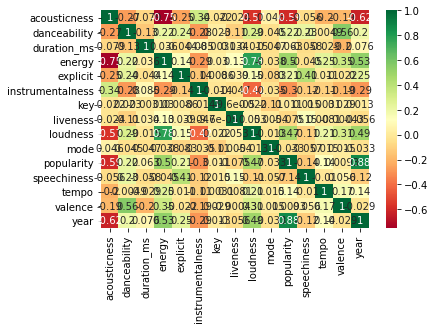

In [26]:
sns.heatmap(df1.corr(), cmap ='RdYlGn', linewidths =0, annot = True)

<br> Qu'est-ce que vous pouvez conclure à partir de ces corrélation? 

<br>

### 2. Lister vos questions et les réponses à ces questions: